# Esille tulleita ongelmia

Tähän notebookiin on koottu yleisiä ongelmia, joita datan käsittelyssä on noussut esiin.

In [1]:
# Esimerkkikoodeja varten tarvittavat paketit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tiedostopolut

Anacondassa ja MyBinderissa avattuna voidaan käyttää suhteellisia tiedostopolkuja, kuten

```python 
kaksoismyonit = pd.read_csv('../Data/Dimuon_DoubleMu.csv')
```    

Tässä ".." vie edelliseen kansioon, josta mennään sitten "Data" kansioon ja valitaan tiedosto "Dimuon_DoubleMu.csv".

Jos Notebookeja käytetään Google Colabissa, ei suhteellisia tiedostopolkuja voida käyttää, vaan tarvitaan suora linkki tiedostoon.
Suoran linkin Github-hakemistossa sijaitsevaan tiedostoon saa avaamalla tiedoston Githubissa, painamalla "View raw", jonka jälkeen voi kopioida linkin suoraan osoiteriviltä.

```python 
kaksoismyonit = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Dimuon_DoubleMu.csv')
``` 

Suoran linkin Google Drivessa sijaitsevaan tiedostoon saa siten, että avaa tiedoston Google Sheets:ssä, valitsee "File -> Publish to the web", ja valitsee julkaistavan tiedoston, sekä julkaisutyypiksi csv-tiedoston. Tällöin saa suoran linkin, jota voi käyttää notebookeissa. Katso ohjeet alta:

![alt](drive1.png)

-------------------------------

![alt](drive2.png)

-------------------------------

![alt](drive3.png)

## Lisärivit tiedoston alussa

Yleisimmin datatiedostoissa on yksi otsikkorivi, joka kertoo mitä dataa kukin sarake sisältää, jonka jälkeen itse datarivit alkavat. Joskus näin ei kuitenkaan ole, vaan otsikkorivi voi puuttua kokonaan tai toisaalta ennen otsikkoriviä saattaa olla jotain muuta ns. metatietoa, joka hankaloittaa tiedoston lukemista.

Jos tiedostossa ei ole sarakkeiden nimiä, käytetään read_csv-funktiolla argumenttia `header=None`:
    
```python 
dataset = pd.read_csv("tiedosto.csv", header=None)
```
    
Jos taas tiedoston alussa on ylimääräisiä rivejä, ne voidaan jättää huomiotta `skiprows=num` komennolla ("num" tilalle laitetaan ylimääräisten rivien lukumäärä):
   
```python 
dataset = pd.read_csv("tiedosto.csv", skiprows=4)
```

## Erityismerkit

Jos tiedostossa on erityismerkkejä (skandit tms.), ne saa auki lisäämällä parametrin encoding read_csv-funktioon. Koodit löytyvät osoitteesta https://docs.python.org/2.4/lib/standard-encodings.html esim.

```python
dataset = pd.read_csv("tiedosto.csv", encoding="iso8859_10")
```

## Desimaalipilkku

Python luulee lukuja merkkijonoiksi, jos desimaalierottimena käytetään pilkkua. Mikäli datatiedostossa on käytetty desimaalierottimena pilkkuja, voidaan datan lukemisvaiheessa pilkut muuttaa pisteiksi antamalla read_csv-funktion parametriksi `decimal=","`. Alla on esimerkki, jossa luetaan tiedosto, jossa erotinmerkkinä on käytetty puolipilkkua ja desimaalierottimena pilkkua.

In [2]:
df = pd.read_csv("desimaalipilkku.csv", sep=";", decimal=",")
df.head()

,Sarake 1,Sarake 2,Sarake 3
0,1.0,2.0,3.0
1,1.1,2.2,3.3
2,3.1,2.2,1.3


## Tyhjät sarakkeet NaN-arvoina 

Pandas tulkitsee tyhjät sarakkeet yleensä "NaN"-arvoiksi (Not a number). Näitä ei luonnollisesti voi esimerkiksi piirtää kuvaajaan, vaan ne tulee käsitellä jotenkin. Joskus voi olla paikallaan esimerkiksi muuttaa kaikki NaN arvot nolliksi. Huom! Tämän kanssa tulee olla erityisen varovainen, sillä yleensä sillä on suuri ero, onko datapisteen arvo nolla vai eikö datapistettä yksinkertaisesti ole olemassa.
Jos NaN-arvot haluaisi kuitenkin muuttaa nolliksi, se onnistuisi seuraavasti:

In [3]:
# Luetaan esimerkkidata
dataset = pd.read_csv("http://www.espoo.fi/materiaalit/Asioi_verkossa/Avoindata/Espoon_py%C3%B6railijamaarat.csv", sep=";")
dataset.head()

/home/juha/anaconda3/envs/opendata/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (0,20,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Päivä,Päivämäärä,Aika,Espoon portti (Eco-Counter),Espoonlahdenraitti (Eco-Counter),Gallen-Kallela (Eco-Counter),Gallen-Kallelan tie (DSL10),Haukilahti (Viacount),Kalevalantien alikulku (DSL10),"Kehä I, Laajalahti (DSL10)",...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
0,pe,3.1.2014,0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pe,3.1.2014,1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pe,3.1.2014,2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pe,3.1.2014,3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pe,3.1.2014,4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Korvataan NaN-arvot nollilla. Nan-arvoihin pääsee käsiksi numpy-paketin nan-komennolla (np.nan)
dataset = dataset.replace(np.nan, 0)
dataset.head()

,Päivä,Päivämäärä,Aika,Espoon portti (Eco-Counter),Espoonlahdenraitti (Eco-Counter),Gallen-Kallela (Eco-Counter),Gallen-Kallelan tie (DSL10),Haukilahti (Viacount),Kalevalantien alikulku (DSL10),"Kehä I, Laajalahti (DSL10)",...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
0,pe,3.1.2014,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,pe,3.1.2014,1:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,pe,3.1.2014,2:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,pe,3.1.2014,3:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,pe,3.1.2014,4:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


## Aikaformaatit

Tyypillisesti aika-akseli tuottaa jonkinverran päänvaivaa, sillä esimerkiksi päivämäärien saaminen akselille ei ole aivan niin yksinkertaista kuin yksinkertaisten numeroarvojen. Yllä olevassa kohdassa luettiin dataa, jossa aika oli ilmoitettu merkkijonona muodossa "HH:MM". Muutetaan kyseisen sarakkeen arvot "DateTime"-muotoon, jolloin niiden visualisoiminen on helpompaa.

Merkkijonona (string) luetun ajan muuntaminen "datetime"-formaattiin:

In [5]:
dataset['Aika'] = pd.to_datetime(dataset['Aika'], format='%H:%M')
t = dataset['Aika'].dt.hour

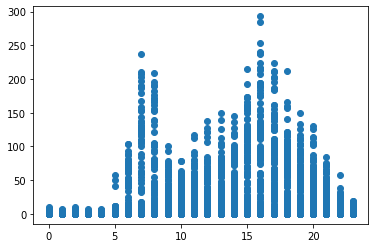

In [6]:
#Tunnit x-akselilla
plt.scatter(t, dataset['Gallen-Kallelan tie (DSL10)'])
plt.show()

Päivämäärä-sarakkeen muuttaminen "DateTime"-muotoon.

In [7]:
#muunna päivämäärä "datetime"-formaattiin, josta sitten voidaan ottaa osat lukuna (ja käyttää ongelmitta kuvaajissa)
dataset["Päivämäärä"] = pd.to_datetime(dataset['Päivämäärä'], format='%d.%m.%Y')
kk = dataset['Päivämäärä'].dt.month

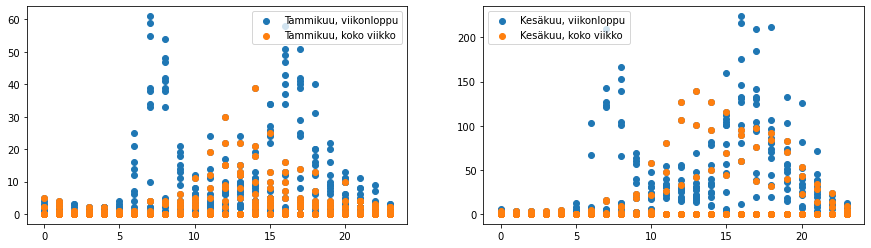

In [8]:
#kuukausi käytössä valintakriteereissä
datajanwe = dataset[((dataset['Päivä']=="la") | (dataset['Päivä']=="su")) & (dataset['Päivämäärä'].dt.month==1)]
datajan = dataset[(dataset['Päivämäärä'].dt.month==1)]
datajunwe = dataset[((dataset['Päivä']=="la") | (dataset['Päivä']=="su")) & (dataset['Päivämäärä'].dt.month==6)]
datajun = dataset[(dataset['Päivämäärä'].dt.month==6)]

fig = plt.figure(figsize=(15, 4)) #kuvan koko

plt.subplot(1, 2, 1) #kaksi kuvaa vierekkäin (kuvia: 1 = yksi rivi, 2=kaksi saraketta, 1 = tämä kuva ens. kohtaan)
plt.scatter(datajan["Aika"].dt.hour,datajan['Gallen-Kallelan tie (DSL10)'], label='Tammikuu, viikonloppu')

plt.scatter(datajanwe["Aika"].dt.hour,datajanwe['Gallen-Kallelan tie (DSL10)'], label='Tammikuu, koko viikko')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(datajun["Aika"].dt.hour,datajun['Gallen-Kallelan tie (DSL10)'], label='Kesäkuu, viikonloppu')

plt.scatter(datajunwe["Aika"].dt.hour,datajunwe['Gallen-Kallelan tie (DSL10)'], label='Kesäkuu, koko viikko')
plt.legend()

plt.show()